In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [61]:
def main(input, image_path):
    image = cv2.imread(image_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    if image is None:
        raise ValueError(f"Error loading image from path: {image_path}")
    Gx, Gy, G = choose_operator(input, gray_image)

    plt.figure(figsize=(16, 4))  
    
    plt.subplot(1, 4, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')
    
    # Gradient in X direction
    plt.subplot(1, 4, 2)
    plt.imshow(Gx, cmap='gray')
    plt.title('Gradient in X direction')
    plt.axis('off')
    
    # Gradient in Y direction
    plt.subplot(1, 4, 3)
    plt.imshow(Gy, cmap='gray')
    plt.title('Gradient in Y direction')
    plt.axis('off')
    
    # Edge-detected image
    plt.subplot(1, 4, 4)
    plt.imshow(G, cmap='gray')
    plt.title(input +' Edge Detection')
    plt.axis('off')
    
    plt.show()

In [11]:
def choose_operator(input, image) :
    if input == "Sobel":
        Gx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
        Gy = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    elif input == "Robert":
        roberts_x = np.array([[1, 0], [0, -1]], dtype=np.float32)
        roberts_y = np.array([[0, 1], [-1, 0]], dtype=np.float32)
        
        Gx = cv2.filter2D(image, cv2.CV_64F, roberts_x)
        Gy = cv2.filter2D(image, cv2.CV_64F, roberts_y)
    elif input == "Prewitt":
        prewitt_x = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]], dtype=np.float32)
        prewitt_y = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]], dtype=np.float32)
        
        Gx = cv2.filter2D(image, cv2.CV_64F, prewitt_x)
        Gy = cv2.filter2D(image, cv2.CV_64F, prewitt_y)
    else :
        print("Invalid input operator")


    # Gradient magnitude
    G = np.sqrt(Gx**2 + Gy**2)
    
    # Normalize to range 0-255
    Gx = np.uint8(255 * np.abs(Gx) / np.max(Gx))
    Gy = np.uint8(255 * np.abs(Gy) / np.max(Gy))
    G = np.uint8(255 * G / np.max(G))

    return Gx, Gy, G

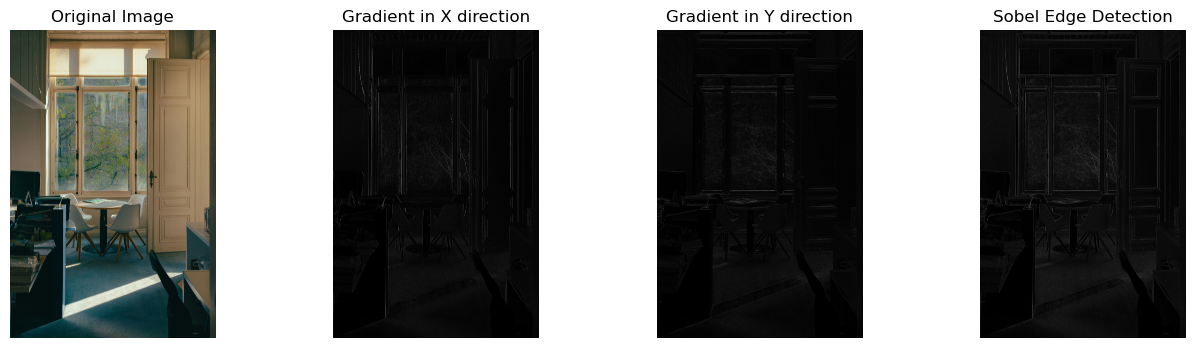

In [47]:
image_path = r"C:\Users\Ashima\Desktop\Q3 2024\MV\room.jpg"
main("Sobel", image_path)

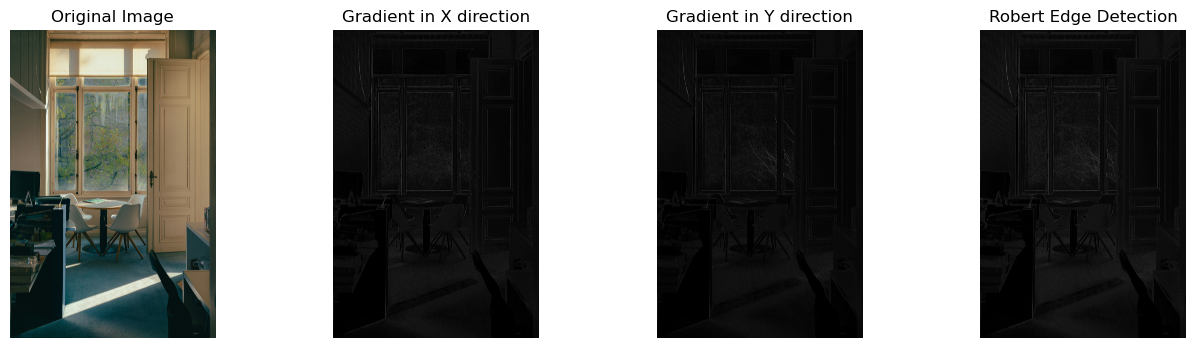

In [49]:
main("Robert", image_path)

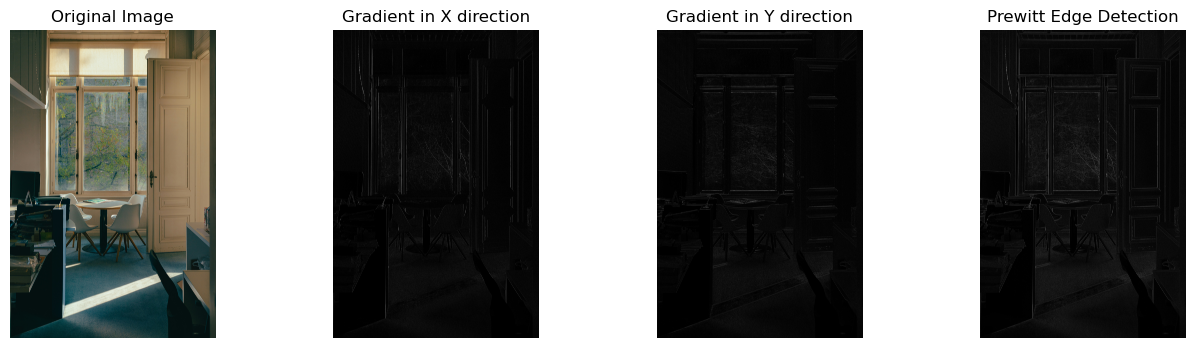

In [51]:
main("Prewitt", image_path)

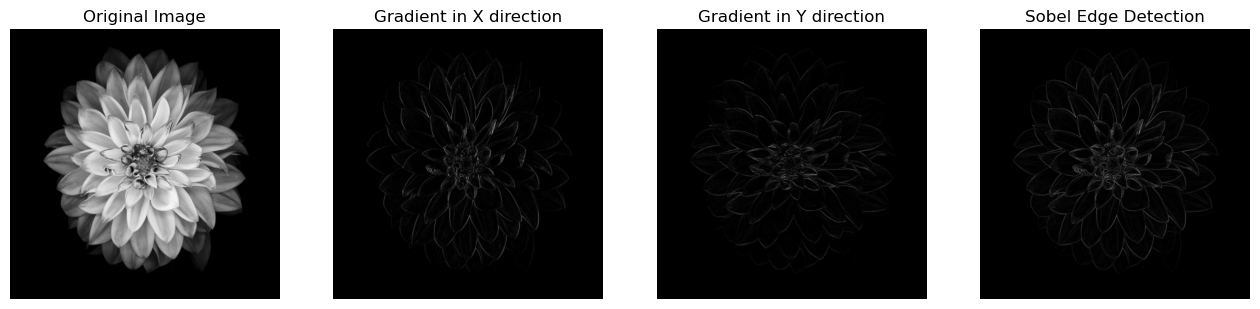

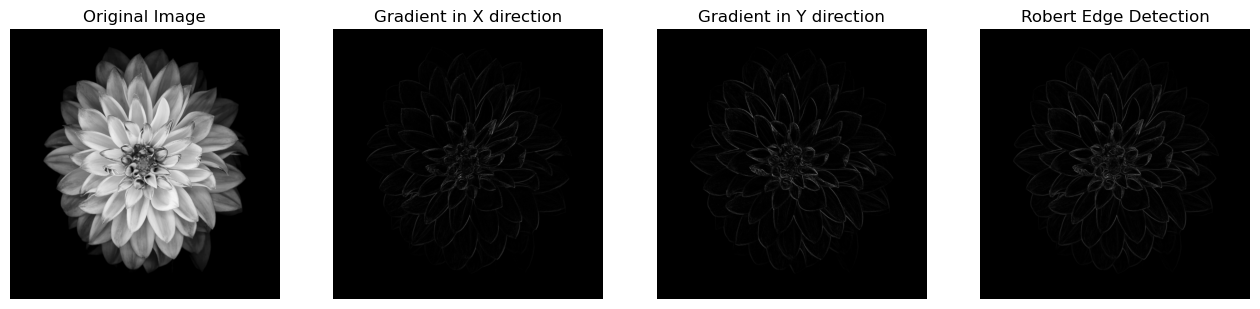

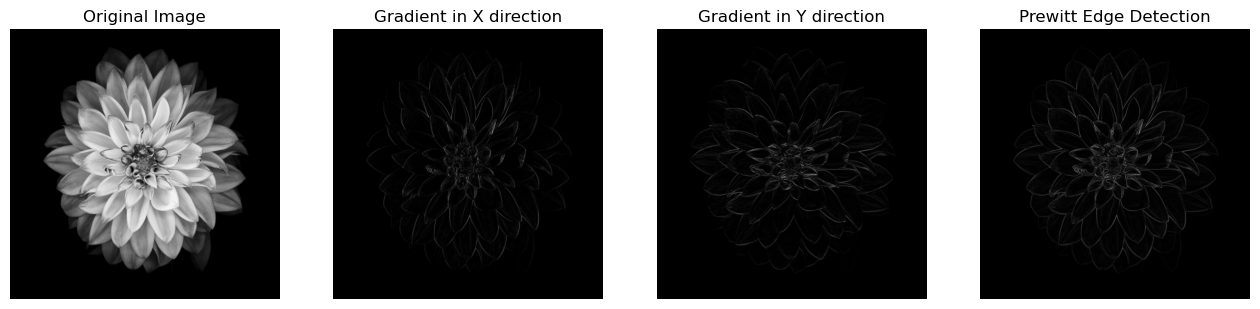

In [55]:
image_path = r"C:\Users\Ashima\Desktop\Q3 2024\MV\bw_flower.jpg"
main("Sobel", image_path)
main("Robert", image_path)
main("Prewitt", image_path)